In [262]:
import numpy as np
import pandas as pd
import string
import re
import nltk
import random
from sklearn.svm import SVC
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

[nltk_data] Downloading package stopwords to /home/jyoti/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jyoti/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [221]:
C_list = [1, 10, 25, 50]
acc_list = []

In [241]:
kernel_acc_list = []

In [257]:

class AuthorClassifier:
    
    vectorize = None
    vectorized_train_data = None
    train_data_labels = None
    
    def preprocess_data(self,train_data_frm):
        
        ''' dropping first column of indices'''
        train_data_frm = train_data_frm.drop(train_data_frm.columns[0], axis='columns')
        
        rows,cols = train_data_frm.shape
               
        ''' removing punctuations'''
        for i, rows in train_data_frm.iterrows():
            val = train_data_frm.iat[i,0]
            fval = val.translate(val.maketrans('','', string.punctuation))
            train_data_frm.at[i, 'text'] = fval
            
        ''' removing numbers'''
        for i, rows in train_data_frm.iterrows():
            val = train_data_frm.iat[i,0]
            fval = re.sub(r'\d+', '', val)
            train_data_frm.at[i, 'text'] = fval
            
        ''' converting to lowercase'''
        for i, rows in train_data_frm.iterrows():
            val = train_data_frm.iat[i,0]
            fval = val.lower()
            train_data_frm.at[i, 'text'] = fval
            
        '''removing stop words'''
        stop_words = set(stopwords.words('english'))
        for i, rows in train_data_frm.iterrows():
            val = train_data_frm.iat[i,0]
            tokens = word_tokenize(val)
            fval = [i for i in tokens if not i in stop_words]
            ffval = " "
            train_data_frm.at[i, 'text'] = ffval.join(fval)
            
        '''removing whitespaces'''
        for i, rows in train_data_frm.iterrows():
            val = train_data_frm.iat[i,0]
            train_data_frm.at[i, 'text'] = val.strip()
                                  
        return train_data_frm
    
    def train_validation_split(self,data_frm,validation_data_size):
       
        if isinstance(validation_data_size, float):
            validation_data_size=round(validation_data_size * len(data_frm))
        indices=data_frm.index.tolist()
        valid_indices=random.sample(indices, validation_data_size)
        valid_datafrm=data_frm.loc[valid_indices]
        train_datafrm=data_frm.drop(valid_indices)
        return train_datafrm, valid_datafrm
    
    
    def prepare_data(self,data_frm):
        data_labels = data_frm.iloc[:,-1]
        data_frm = data_frm.iloc[:,:-1]
        return data_frm, data_labels
    
    
    def run_svm(self, vectorized_validation_data, validation_data_labels):
        
#         for i in C_list:
        obj = SVC(kernel='linear', decision_function_shape='ovr', C=10)

#         obj = SVC(kernel='poly', degree = 4, C = 10)
        
#         ''' kernel rbf'''
#         obj = SVC(kernel='rbf', C = 10)
        
#         ''' kernel sigmoid'''
#         obj = SVC(kernel='sigmoid', C = 10)

        obj.fit(self.vectorized_train_data, self.train_data_labels)
        predict_values = obj.predict(vectorized_validation_data)
#         kernel_acc_list.append(accuracy_score(validation_data_labels, predict_values))
#         acc_list.append(accuracy_score(validation_data_labels, predict_values))
#         print(predict_values)
#         print(validation_data_labels)
#         print(accuracy_score(predict_values, validation_data_labels))
        return predict_values

    
    
    def check_validation_data(self,train_data_frm, validation_data_frm):
        validation_data_frm, validation_data_labels = self.prepare_data(validation_data_frm)
        validation_data = validation_data_frm.values.flatten()
        vectorized_validation_data = self.vectorize.transform(validation_data)
#         print(vectorized_validation_data)
        validation_data_labels = validation_data_labels.values.flatten()
        self.train_data_labels = self.train_data_labels.values.flatten()
        predict_values = self.run_svm(vectorized_validation_data, validation_data_labels)
#         predict_values = self.run_svm(vectorized_validation_data, validation_data_labels)
        return predict_values, validation_data_labels
#         print(vectorized_validation_data.shape)
        
    
    def train(self,train_path):
        train_data_frm = pd.read_csv(train_path)
        train_data_frm = self.preprocess_data(train_data_frm)
        
        random.seed(0)
        train_data_frm, validation_data_frm = self.train_validation_split(train_data_frm, validation_data_size = 0.3)
        train_data_frm, self.train_data_labels = self.prepare_data(train_data_frm)
        self.vectorize = TfidfVectorizer()
        train_data_frm = train_data_frm.values.flatten()
        self.vectorized_train_data = self.vectorize.fit_transform(train_data_frm)
#         self.check_validation_data(train_data_frm, validation_data_frm)
        predict_values, actual_values = self.check_validation_data(train_data_frm, validation_data_frm)
        return predict_values, actual_values
        
    def predict(self, test_path):
        test_data_frm = pd.read_csv(test_path)
        test_data_frm = self.preprocess_data(test_data_frm)
        test_data_frm = test_data_frm.values.flatten()
        vectorized_test_data = self.vectorize.transform(test_data_frm)
        ''' kernel linear function '''
        obj = SVC(kernel='linear', decision_function_shape='ovr', C=10)
        
#         ''' kernel poly'''
#         obj = SVC(kernel='poly', degree = 4, C = 10)
        
#         ''' kernel rbf'''
#         obj = SVC(kernel='rbf', C = 10)
        
#         ''' kernel sigmoid'''
#         obj = SVC(kernel='sigmoid', C = 100)
        
        obj.fit(self.vectorized_train_data, self.train_data_labels)
        predict_values = obj.predict(vectorized_test_data)
        return predict_values
        
        
        


In [258]:
auth_classifier = AuthorClassifier()
predict_values, actual_values = auth_classifier.train('/home/jyoti/Documents/SMAI/assign2/Q5/Question-5/Train.csv')
# print(kernel_acc_list)
print(predict_values)
print(actual_values)

# predictions = auth_classifier.predict('/home/jyoti/Documents/SMAI/assign2/Q5/Question-5/Test.csv')
# print(predictions)

['MWS' 'EAP' 'HPL' ... 'MWS' 'MWS' 'EAP']
['MWS' 'HPL' 'EAP' ... 'EAP' 'MWS' 'EAP']


## Plot C vs Accuracy Score

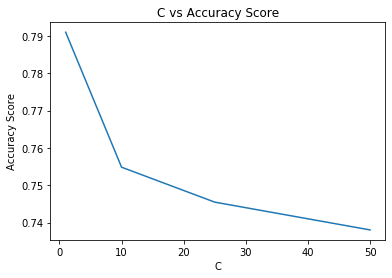

In [229]:
plt.plot(C_list, acc_list) 
plt.xlabel('C') 
plt.ylabel('Accuracy Score') 
plt.title('C vs Accuracy Score') 
plt.show()

## Plot Kernel vs Accuracy Score

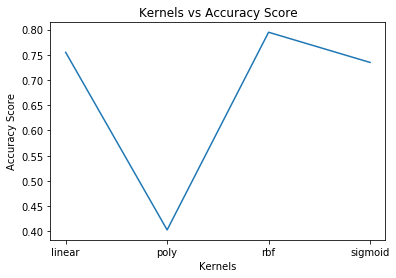

In [254]:
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
plt.plot(kernel_list,kernel_acc_list) 
plt.xlabel('Kernels') 
plt.ylabel('Accuracy Score') 
plt.title('Kernels vs Accuracy Score') 
plt.show()

## Performance Metrics

### 1. Accuracy Score

In [259]:
print("Accuracy Score = ", accuracy_score(actual_values, predict_values))

Accuracy Score =  0.7548414556288572


### 2. F1 Score

In [260]:
print("F1 Score = ", f1_score(actual_values, predict_values, average='micro', zero_division='warn'))

F1 Score =  0.7548414556288572


### 3. Confusion Matrix

In [263]:
print(confusion_matrix(actual_values, predict_values))

[[1492  165  215]
 [ 277  960  102]
 [ 298   95 1095]]


### 4. Classification Report

In [264]:
print(classification_report(actual_values, predict_values))

              precision    recall  f1-score   support

         EAP       0.72      0.80      0.76      1872
         HPL       0.79      0.72      0.75      1339
         MWS       0.78      0.74      0.76      1488

    accuracy                           0.75      4699
   macro avg       0.76      0.75      0.75      4699
weighted avg       0.76      0.75      0.75      4699

